### Some basic machine learning using Keras

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Regression

In [2]:
df = pd.read_csv('./data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


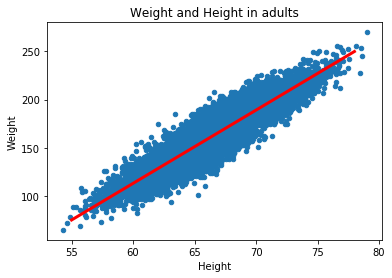

In [3]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

#### Linear regression in Keras

In [4]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [6]:
## create data
X = df[['Height']].values
y_true = df['Weight'].values

X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)


In [7]:
model = Sequential()
model.add(Dense(1, input_shape=(1,))) ## similuate a linear regression with one variable and one output
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer=Adam(lr=0.1),loss='mean_squared_error')

In [9]:
model.fit(X_train,y_train,epochs=40,)

Epoch 1/40
8000/8000 [==============================] - 1s 125us/step - loss: 3535.7233
Epoch 2/40
8000/8000 [==============================] - 0s 45us/step - loss: 565.6306
Epoch 3/40
8000/8000 [==============================] - 0s 44us/step - loss: 563.7456
Epoch 4/40
8000/8000 [==============================] - 0s 45us/step - loss: 563.3791
Epoch 5/40
8000/8000 [==============================] - 0s 46us/step - loss: 558.9684
Epoch 6/40
8000/8000 [==============================] - 0s 44us/step - loss: 555.9920
Epoch 7/40
8000/8000 [==============================] - 0s 39us/step - loss: 552.7025
Epoch 8/40
8000/8000 [==============================] - 0s 40us/step - loss: 550.5480
Epoch 9/40
8000/8000 [==============================] - 0s 42us/step - loss: 543.0466
Epoch 10/40
8000/8000 [==============================] - 0s 43us/step - loss: 537.2102
Epoch 11/40
8000/8000 [==============================] - 0s 44us/step - loss: 536.3880
Epoch 12/40
8000/8000 [===========================

In [10]:
W, B = model.get_weights()

In [11]:
print(W,B)

[[4.565579]] [-140.10622]


#### Evaluating Model Performance

In [12]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [13]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	296.3
The Mean Squared Error on the Test set is:	307.2


In [14]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.711
The R2 score on the Test set is:	0.709


## Classification

In [15]:
df = pd.read_csv('./data/user_visit_duration.csv')
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


In [16]:
X = df[['Time (min)']].values
y = df['Buy'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

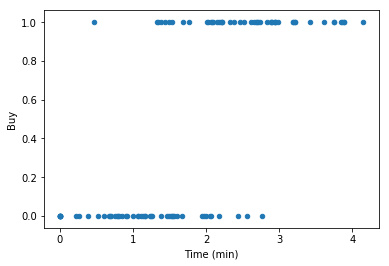

In [17]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

In [18]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(X_train, y_train, epochs=25,verbose=0)  ## do not print out iterations results 

In [20]:
## predict
y_pred  = model.predict(X_test)
y_class_pred = y_pred > 0.5

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y_test, y_class_pred)))

The accuracy score is 0.850


### Cross Validation - Kfold validation

In [23]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [24]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [25]:
from sklearn.model_selection import cross_val_score, KFold
import pandas as pd

In [26]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
    model.compile(SGD(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [27]:
## now our keras classifier works just like sklean modoels, a lot functions will work the same 
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

In [28]:
## 3 split cross validation
## it is a cross validation iterator
cv = KFold(3, shuffle=True)  ## random 3 splits

In [29]:
df = pd.read_csv('./data/user_visit_duration.csv')
df.head()
X = df[['Time (min)']].values
y = df['Buy'].values

In [30]:
## pass the model to cross validation score
scores = cross_val_score(model, X, y, cv=cv)

In [31]:
scores  ## accurace score for 3 folds

array([0.79411765, 0.63636364, 0.87878788])

In [32]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.7698 ± 0.1005


## Confusion Matrix, precision and recall

In [44]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import classification_report

In [38]:
y = np.random.randint(2, size=100)
y_class_pred = np.random.randint(2, size=100)

In [40]:
confusion_matrix(y, y_class_pred)

array([[25, 25],
       [22, 28]])

In [41]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [42]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,25,25
Buy,22,28


In [47]:
print("Precision: \t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))

Precision: 	0.528
Recall:  	0.560
F1 Score:	0.544


## Feature Preprocessing

In [49]:
df = pd.read_csv('./data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


#####  1) we can convert categorical variables to one hot 

In [50]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [52]:
## pandas function can do that easily 
pd.get_dummies(df['Gender'], prefix='Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


#### 2) rescale input data 

In [54]:
## it is very often to do a min max scaling
## and sklearn has a function for that 
from  sklearn.preprocessing  import MinMaxScaler

In [55]:
mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,0.47,0.49
std,3.85,32.11,0.16,0.16
min,54.26,64.70,0.00,0.00
25%,63.51,135.82,0.35,0.37
50%,66.32,161.21,0.47,0.49
75%,69.17,187.17,0.60,0.60
max,79.00,269.99,1.00,1.00


In [56]:
## we can also use standardScaling, mean, standarded scaling
from sklearn.preprocessing import StandardScaler

In [57]:
ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,0.47,0.49,0.00,0.00
std,3.85,32.11,0.16,0.16,1.00,1.00
min,54.26,64.70,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,0.60,0.60,0.80,0.73
max,79.00,269.99,1.00,1.00,3.38,3.28


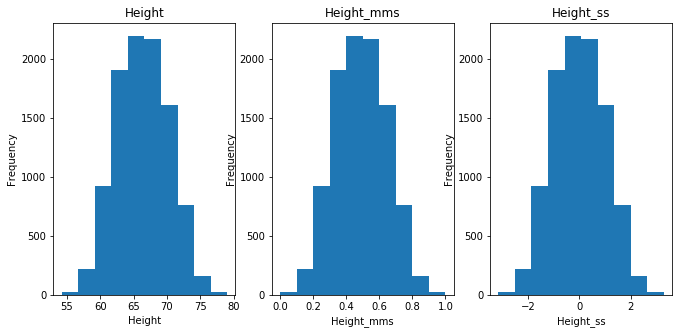

In [60]:
plt.figure(figsize=(15,5))

for i, feature in enumerate(['Height','Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)